In [51]:
import csv
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [52]:
path = Path("./breast_cancer.csv")
lines = path.read_text().split("\n")
reader = csv.reader(lines)
header_row = next(reader)

# In the data the Class 2 represents Benign and Class 4 represents Malignant
for row,index in enumerate(header_row):
    print(f"{row}:{index}")

0:Clump Thickness
1:Uniformity of Cell Size
2:Uniformity of Cell Shape
3:Marginal Adhesion
4:Single Epithelial Cell Size
5:Bare Nuclei
6:Bland Chromatin
7:Normal Nucleoli
8:Mitoses
9:Class


In [53]:
x_data_list,y_data_list = [],[]

for row in reader:
    y_data_list.append(int(row[9]))
    x_data_list.append([int(value) for value in row[:9]])
m = len(x_data_list) # Total training data
n = len(x_data_list[0]) # Number of features

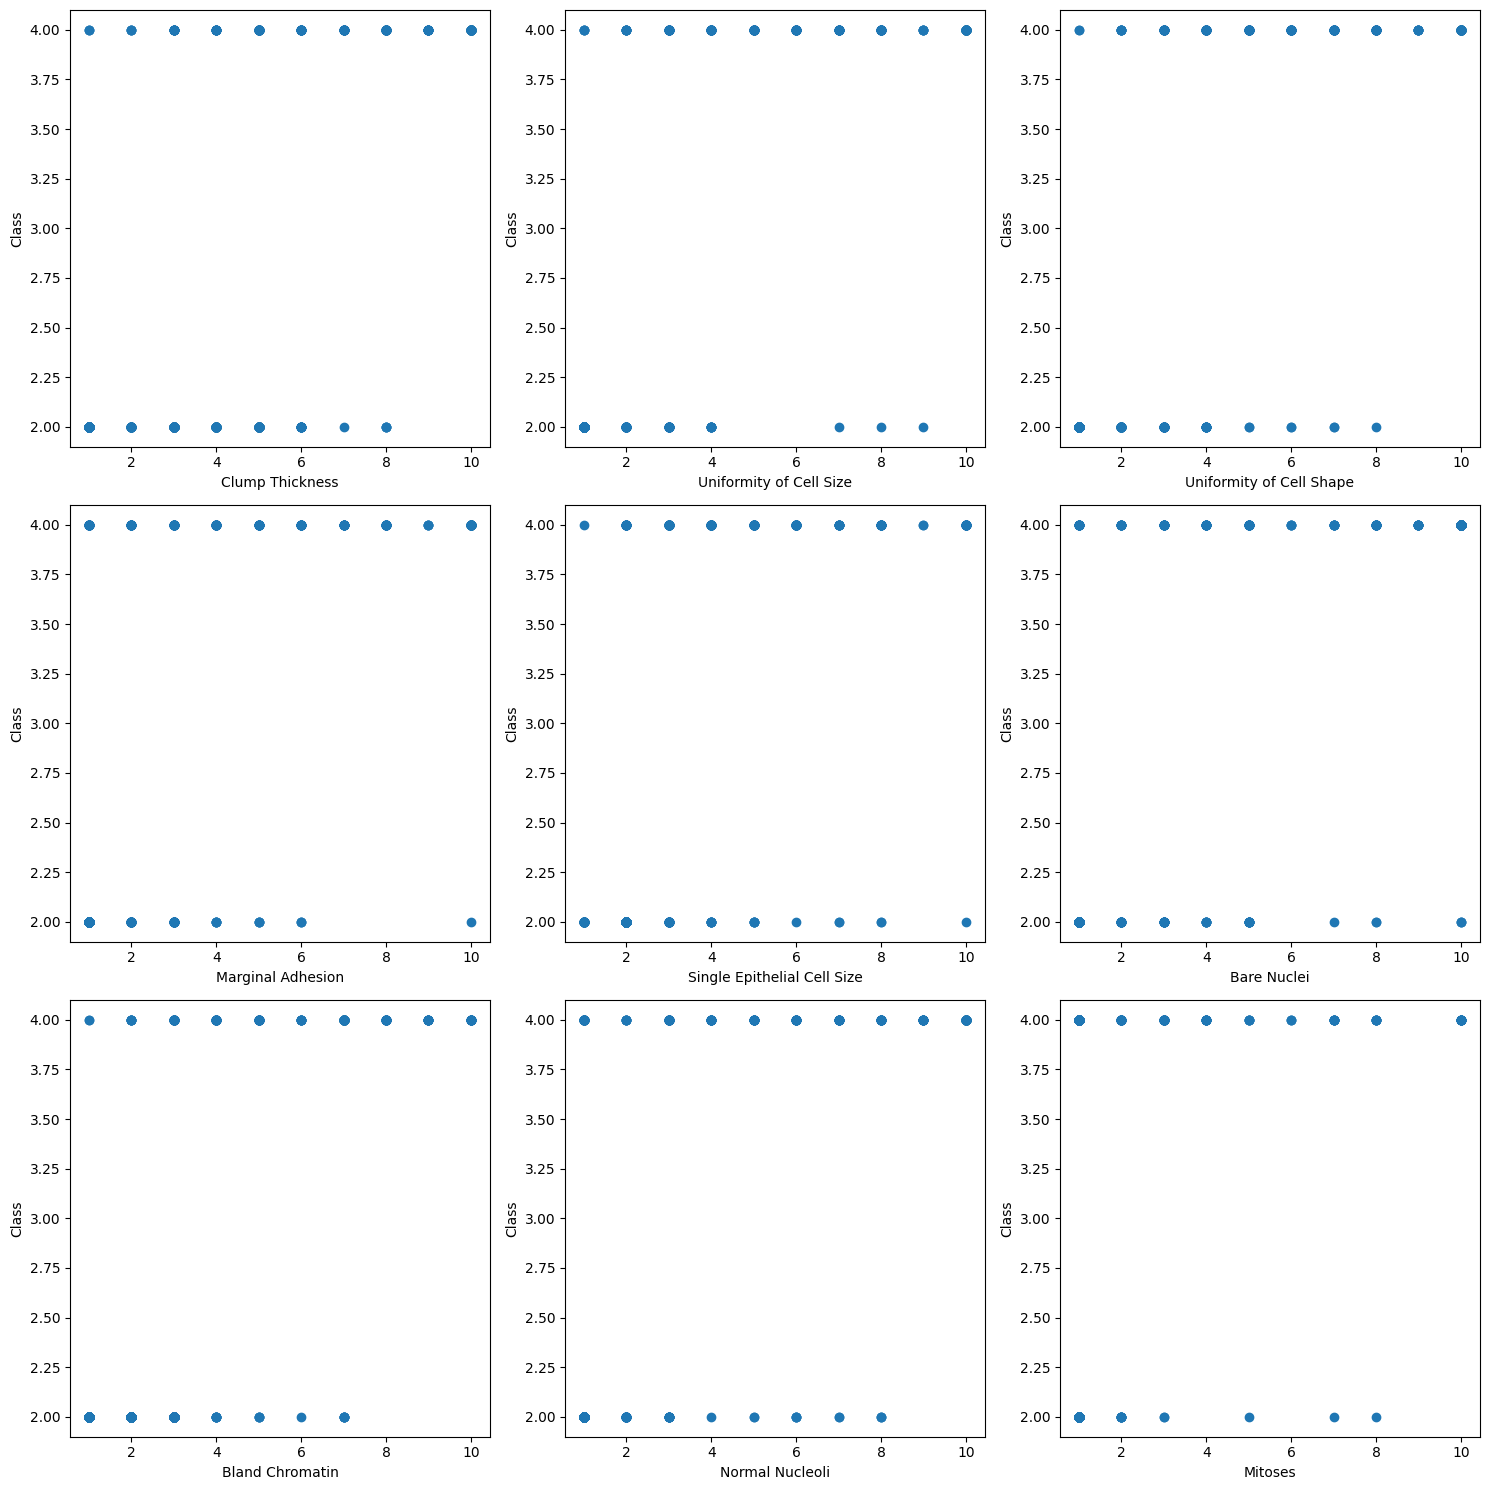

In [54]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))  # Adjusted figsize for better visualization
ax = ax.flatten()  # Flatten the 2D array of axes

n = min(len(header_row), len(ax))  # Ensure n does not exceed the number of subplots

for i in range(n):
    x_data = [x[i] for x in x_data_list]
    ax[i].scatter(x_data, y_data_list)
    ax[i].set_xlabel(header_row[i])
    ax[i].set_ylabel("Class")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



In [56]:
#Training
scaler = StandardScaler()
x_fit_normalized = scaler.fit_transform(x_data_list)
lr_model = LogisticRegression()
lr_model.fit(x_fit_normalized, y_data_list)
lr_model.score(x_fit_normalized, y_data_list)
# 0.9707174231332357 - Accuracy of the model based on training Data

0.9707174231332357